#### NOTE : THIS MODEL DOES NOT CONSIDER PRESENT DAY DATA

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('lagged.csv')

In [19]:
df


,Unnamed: 0,datetime_utc,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,...,_dewptm_lag3,_fog_lag3,_hail_lag3,_hum_lag3,_pressurem_lag3,_rain_lag3,_snow_lag3,_tempm_lag3,_tornado_lag3,_wdird_lag3
0,0,02/11/96,10.458333,0,0,48.625000,1009.833333,0,0,22.916667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,03/11/96,12.041667,0,0,55.958333,1010.500000,0,0,21.791667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,04/11/96,10.222222,0,0,48.055556,1011.333333,0,0,22.722222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,05/11/96,8.200000,0,0,29.400000,1011.800000,0,0,27.800000,...,10.458333,0.0,0.0,48.625000,1009.833333,0.0,0.0,22.916667,0.0,106.666667
4,4,06/11/96,9.062500,0,0,47.875000,1011.812500,0,0,21.937500,...,12.041667,0.0,0.0,55.958333,1010.500000,0.0,0.0,21.791667,0.0,106.666667
5,5,07/11/96,9.458333,0,0,48.000000,1013.416667,0,0,21.750000,...,10.222222,0.0,0.0,48.055556,1011.333333,0.0,0.0,22.722222,0.0,55.555556
6,6,08/11/96,8.130435,0,0,45.217391,1014.708333,0,0,21.260870,...,8.200000,0.0,0.0,29.400000,1011.800000,0.0,0.0,27.800000,0.0,208.000000
7,7,09/11/96,7.772727,0,0,47.181818,1013.863636,0,0,19.909091,...,9.062500,0.0,0.0,47.875000,1011.812500,0.0,0.0,21.937500,0.0,94.375000
8,8,10/11/96,6.681818,0,0,44.136364,511.590909,0,0,20.454545,...,9.458333,0.0,0.0,48.000000,1013.416667,0.0,0.0,21.750000,0.0,117.916667
9,9,11/11/96,5.782609,0,0,37.739130,1012.478261,0,0,22.086957,...,8.130435,0.0,0.0,45.217391,1014.708333,0.0,0.0,21.260870,0.0,87.083333


In [20]:
df=df.dropna()
df=df.drop(['datetime_utc'],axis=1)

In [21]:
df

,Unnamed: 0,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,...,_dewptm_lag3,_fog_lag3,_hail_lag3,_hum_lag3,_pressurem_lag3,_rain_lag3,_snow_lag3,_tempm_lag3,_tornado_lag3,_wdird_lag3
3,3,8.200000,0,0,29.400000,1011.800000,0,0,27.800000,0,...,10.458333,0.0,0.0,48.625000,1009.833333,0.0,0.0,22.916667,0.0,106.666667
4,4,9.062500,0,0,47.875000,1011.812500,0,0,21.937500,0,...,12.041667,0.0,0.0,55.958333,1010.500000,0.0,0.0,21.791667,0.0,106.666667
5,5,9.458333,0,0,48.000000,1013.416667,0,0,21.750000,0,...,10.222222,0.0,0.0,48.055556,1011.333333,0.0,0.0,22.722222,0.0,55.555556
6,6,8.130435,0,0,45.217391,1014.708333,0,0,21.260870,0,...,8.200000,0.0,0.0,29.400000,1011.800000,0.0,0.0,27.800000,0.0,208.000000
7,7,7.772727,0,0,47.181818,1013.863636,0,0,19.909091,0,...,9.062500,0.0,0.0,47.875000,1011.812500,0.0,0.0,21.937500,0.0,94.375000
8,8,6.681818,0,0,44.136364,511.590909,0,0,20.454545,0,...,9.458333,0.0,0.0,48.000000,1013.416667,0.0,0.0,21.750000,0.0,117.916667
9,9,5.782609,0,0,37.739130,1012.478261,0,0,22.086957,0,...,8.130435,0.0,0.0,45.217391,1014.708333,0.0,0.0,21.260870,0.0,87.083333
10,10,7.541667,0,0,39.333333,553.333333,0,0,23.458333,0,...,7.772727,0.0,0.0,47.181818,1013.863636,0.0,0.0,19.909091,0.0,117.272727
11,11,12.181818,0,0,51.227273,533.608696,0,0,23.363636,0,...,6.681818,0.0,0.0,44.136364,511.590909,0.0,0.0,20.454545,0.0,117.272727
12,12,8.722222,0,0,45.722222,1016.888889,0,0,21.888889,0,...,5.782609,0.0,0.0,37.739130,1012.478261,0.0,0.0,22.086957,0.0,82.608696


In [22]:
df=df.drop(['Unnamed: 0',' _dewptm',' _fog',' _hail',' _hum',' _pressurem',' _snow',' _tempm',' _thunder',' _tornado',' _wdird'],axis=1)
df.isnull().sum()


 _rain              0
_dewptm_lag1        0
 _dewptm_lag1       0
 _fog_lag1          0
 _hail_lag1         0
 _hum_lag1          0
 _pressurem_lag1    0
 _rain_lag1         0
 _snow_lag1         0
 _tempm_lag1        0
 _tornado_lag1      0
 _wdird_lag1        0
 _dewptm_lag2       0
 _fog_lag2          0
 _hail_lag2         0
 _hum_lag2          0
 _pressurem_lag2    0
 _rain_lag2         0
 _snow_lag2         0
 _tempm_lag2        0
 _tornado_lag2      0
 _wdird_lag2        0
 _dewptm_lag3       0
 _fog_lag3          0
 _hail_lag3         0
 _hum_lag3          0
 _pressurem_lag3    0
 _rain_lag3         0
 _snow_lag3         0
 _tempm_lag3        0
 _tornado_lag3      0
 _wdird_lag3        0
dtype: int64

# LOGISTIC REGRESSION 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop([' _rain'],axis=1),df[' _rain'], test_size=0.20)

In [24]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=200000).fit(X_train, y_train)
y_predicted=clf.predict(X_train)
print(y_predicted)
clf.score(X_train,y_train)

[0 0 0 ... 0 0 0]


0.8485781561311356

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
mean_absolute_error(y_predicted,y_train)

0.15142184386886434

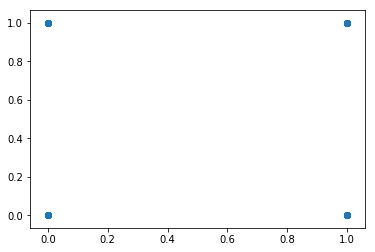

In [27]:
plt.scatter(y_predicted,y_train)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_predicted)

array([[4504,  161],
       [ 675,  181]])

In [29]:
from sklearn.metrics import precision_recall_fscore_support

In [30]:
prfs=precision_recall_fscore_support(y_train,y_predicted)

In [31]:
prfs

(array([0.86966596, 0.52923977]),
 array([0.96548767, 0.2114486 ]),
 array([0.91507517, 0.30217028]),
 array([4665,  856]))

# MODEL VALIDATION

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=200000).fit(X_test, y_test)
y_tested=clf.predict(X_test)
print(y_tested)
clf.score(X_test,y_test)
rmse = mean_squared_error(y_test, y_tested)
r2 = r2_score(y_test, y_tested)
print('Slope:' ,clf.coef_)
print('Intercept:', clf.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

[0 0 0 ... 0 0 0]
Slope: [[ 2.55233736e-02  2.55233736e-02 -1.45432115e-01  7.34762792e-03
   1.30119099e-02 -1.92849553e-04  7.12213194e-01  0.00000000e+00
   6.09043627e-02 -3.70539518e-03 -2.10107214e-03  9.51294777e-02
  -1.05213999e-01  1.59848773e-02 -2.90604602e-02 -6.60964820e-07
   8.98349092e-02  0.00000000e+00 -1.47706915e-01  0.00000000e+00
   1.00686488e-03 -5.26041811e-02  1.49364974e-01 -3.97118048e-02
   6.81670704e-03 -1.85579528e-04  8.58393574e-02 -9.32525224e-03
   3.07647868e-02 -1.77247076e-02 -1.00350619e-03]]
Intercept: [0.01694841]
Root mean squared error:  0.15278783490224476
R2 score:  -0.12433247931843439


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_tested)

array([[1108,   49],
       [ 162,   62]])

In [34]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_tested,y_test)

(array([0.95764909, 0.27678571]),
 array([0.87244094, 0.55855856]),
 array([0.91306139, 0.37014925]),
 array([1270,  111]))

In [35]:
mean_absolute_error(y_tested,y_test)

0.15278783490224476

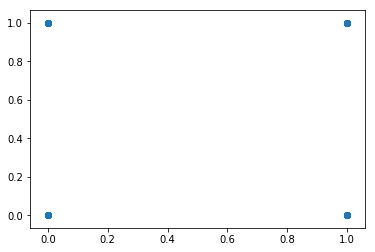

In [36]:
plt.scatter(y_tested,y_test)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,y_tested)

0.8472121650977552

In [39]:
from sklearn import metrics

In [40]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_tested)

In [41]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.04235091 1.        ]
[0.         0.27678571 1.        ]
[2 1 0]


In [42]:
print(metrics.auc(fpr, tpr))

0.6172174033831338
